In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [84]:
sales=pd.read_csv("C:\\Users\\91965\\OneDrive\\Desktop\\train.csv")
sales.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [85]:
#checking for any null values
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [86]:
#dropping store and item columns
sales=sales.drop(['store','item'],axis=1)

In [87]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [88]:
#converting date from object datatype to dateTime datatype
sales['date']=pd.to_datetime(sales['date'])

In [89]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [90]:
sales['sales']=sales['sales'].astype(int)

In [91]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 10.4 MB


In [92]:
#converting date to month period and sum the no of items in each month
sales['date']=sales['date'].dt.to_period("M")
monthlysales=sales.groupby('date').sum().reset_index()

In [93]:
#converting the dates to timestamp datatype
monthlysales['date']=monthlysales['date'].dt.to_timestamp()

In [94]:
monthlysales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


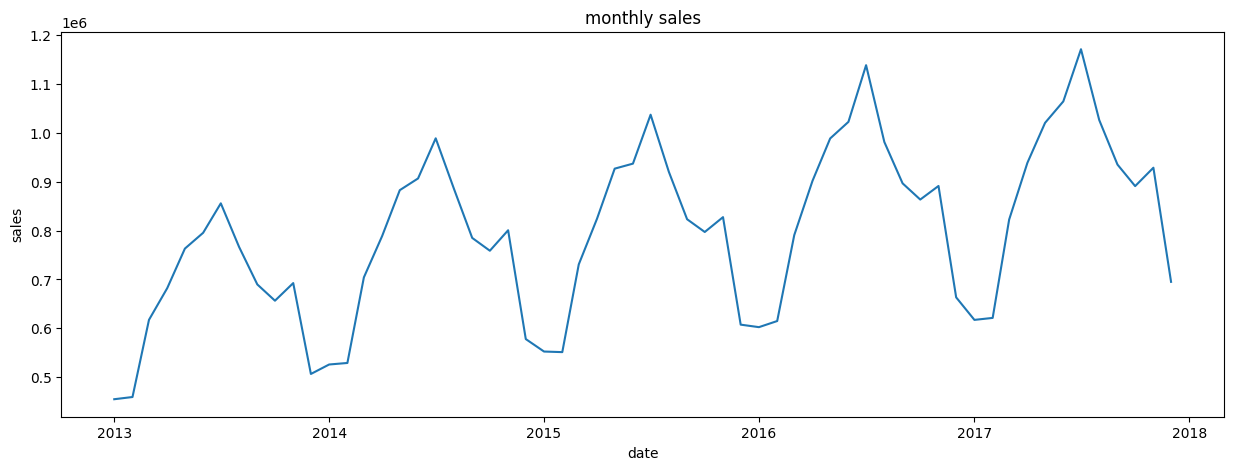

In [95]:
#vizualization
plt.figure(figsize=(15,5))
plt.plot(monthlysales['date'],monthlysales['sales'])
plt.xlabel("date")
plt.ylabel("sales")
plt.title("monthly sales")
plt.show()

In [96]:
monthlysales['sales_difference']=monthlysales['sales'].diff()
monthlysales=monthlysales.dropna()
monthlysales.head(5)

,date,sales,sales_difference
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0


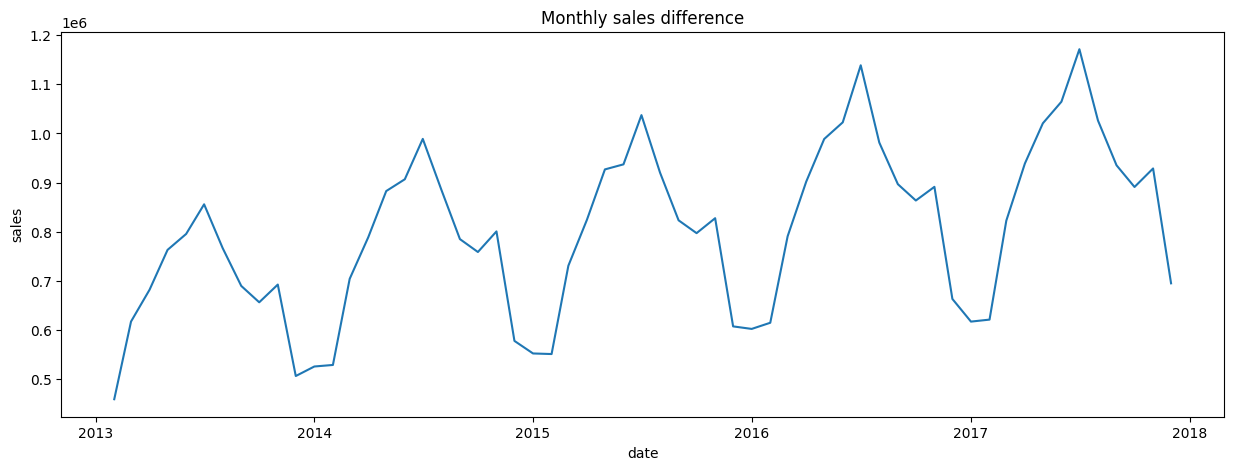

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(monthlysales['date'],monthlysales['sales'])
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Monthly sales difference")
plt.show()

In [98]:
#dropping of sales and date
supervised_data=monthlysales.drop(['date','sales'],axis=1)

In [99]:
#preparing the supervised data
for i in range(1,13):
    col_name='month_'+str(i)
    supervised_data[col_name]=supervised_data['sales_difference'].shift(i)
supervised_data=supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_difference,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [100]:
#split data into train and test
train_data=supervised_data[:-12]
test_data=supervised_data[-12:]
print("train data shape:", train_data.shape)
print("test data shape:", test_data.shape)

train data shape: (35, 13)
test data shape: (12, 13)


In [101]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

In [102]:
x_train,y_train=train_data[:,1:],train_data[:,0:1]
x_test,y_test=test_data[:,1:],test_data[:,0:1]
y_train=y_train.ravel()
y_test=y_test.ravel()
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (35, 12)
y_train shape:  (35,)
x_test shape:  (12, 12)
y_test shape:  (12,)


In [103]:
# make prediction data frame to merge the predicted sales of all trained algs
sales_dates=monthlysales['date'][-12:].reset_index(drop=True)
predict_df=pd.DataFrame(sales_dates)

In [104]:
actual_sales=monthlysales['sales'][-13:].to_list()
print(actual_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


In [105]:
#to create linear regression model and predicted output
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
linear_pre=linear_model.predict(x_test)

In [106]:
linear_pre=linear_pre.reshape(-1,1)
#this is a set matrix-contains the input features of the test data and also the predicted output
linear_pre_test_set=np.concatenate([linear_pre,x_test],axis=1)
linear_pre_test_set=scaler.inverse_transform(linear_pre_test_set)

In [107]:
result_list=[]
for index in range(0,len(linear_pre_test_set)):
    result_list.append(linear_pre_test_set[index][0]+actual_sales[index])
linear_pre_series=pd.Series(result_list, name="Linear Prediction")
predict_df=predict_df.merge(linear_pre_series,left_index=True,right_index=True)

In [108]:
print(predict_df)

         date  Linear Prediction
0  2017-01-01       6.479148e+05
1  2017-02-01       6.283374e+05
2  2017-03-01       8.195190e+05
3  2017-04-01       9.436391e+05
4  2017-05-01       1.033653e+06
5  2017-06-01       1.065286e+06
6  2017-07-01       1.201561e+06
7  2017-08-01       1.002123e+06
8  2017-09-01       9.415142e+05
9  2017-10-01       9.080646e+05
10 2017-11-01       9.167461e+05
11 2017-12-01       6.947978e+05


In [109]:
lr_mse=np.sqrt(mean_squared_error(predict_df['Linear Prediction'],monthlysales['sales'][-12:]))
lr_mae=mean_absolute_error(predict_df['Linear Prediction'],monthlysales['sales'][-12:])
lr_r2=r2_score(predict_df['Linear Prediction'],monthlysales['sales'][-12:])
print("Linear Regression MSE:",lr_mse)
print("Linear Regression MAE:",lr_mae)
print("Linear Regression R2:",lr_r2)

Linear Regression MSE: 16221.272385416896
Linear Regression MAE: 12433.184266490784
Linear Regression R2: 0.9906152516380968


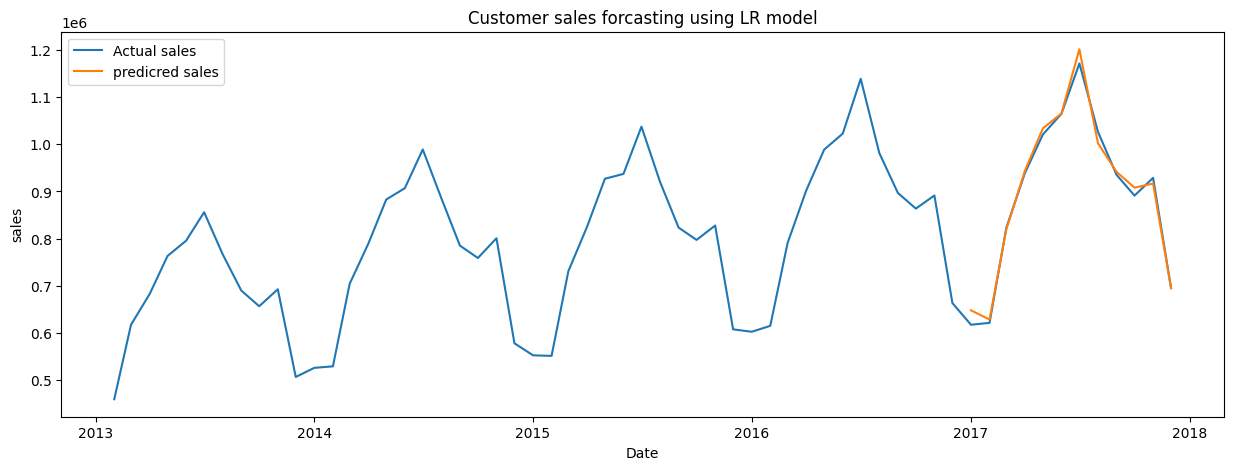

In [110]:
#vizualization of the prediction against actual sales
plt.figure(figsize=(15,5))
#actual sales
plt.plot(monthlysales['date'],monthlysales['sales'])
#predicted sales
plt.plot(predict_df['date'],predict_df['Linear Prediction'])
plt.title("Customer sales forcasting using LR model")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend(['Actual sales','predicred sales'])
plt.show()